In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv("../ign.csv")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plot;

In [4]:
plot.style.use('ggplot');

Text(0.5,0.98,'Review Scores (all systems)')

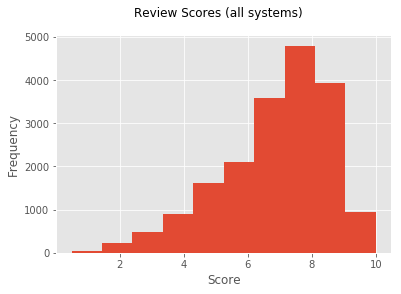

In [5]:
reviews["score"].plot(kind = "hist")
plot.xlabel('Score')
plot.suptitle("Review Scores (all systems)")

In [6]:
import seaborn as sns

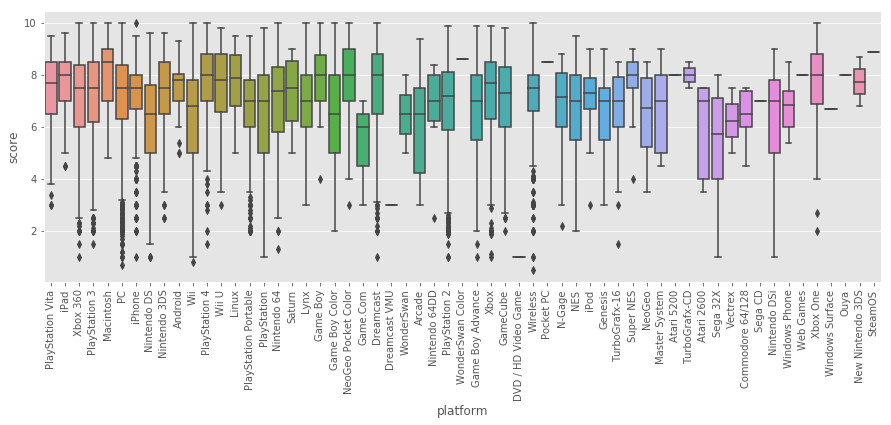

In [7]:
plot.subplots(figsize = (15,5))
reviews_boxplot_by_platform = sns.boxplot(x = 'platform', y = 'score', 
                                          data = reviews);

reviews_boxplot_by_platform.set_xticklabels(reviews_boxplot_by_platform.get_xticklabels(),rotation = 90);

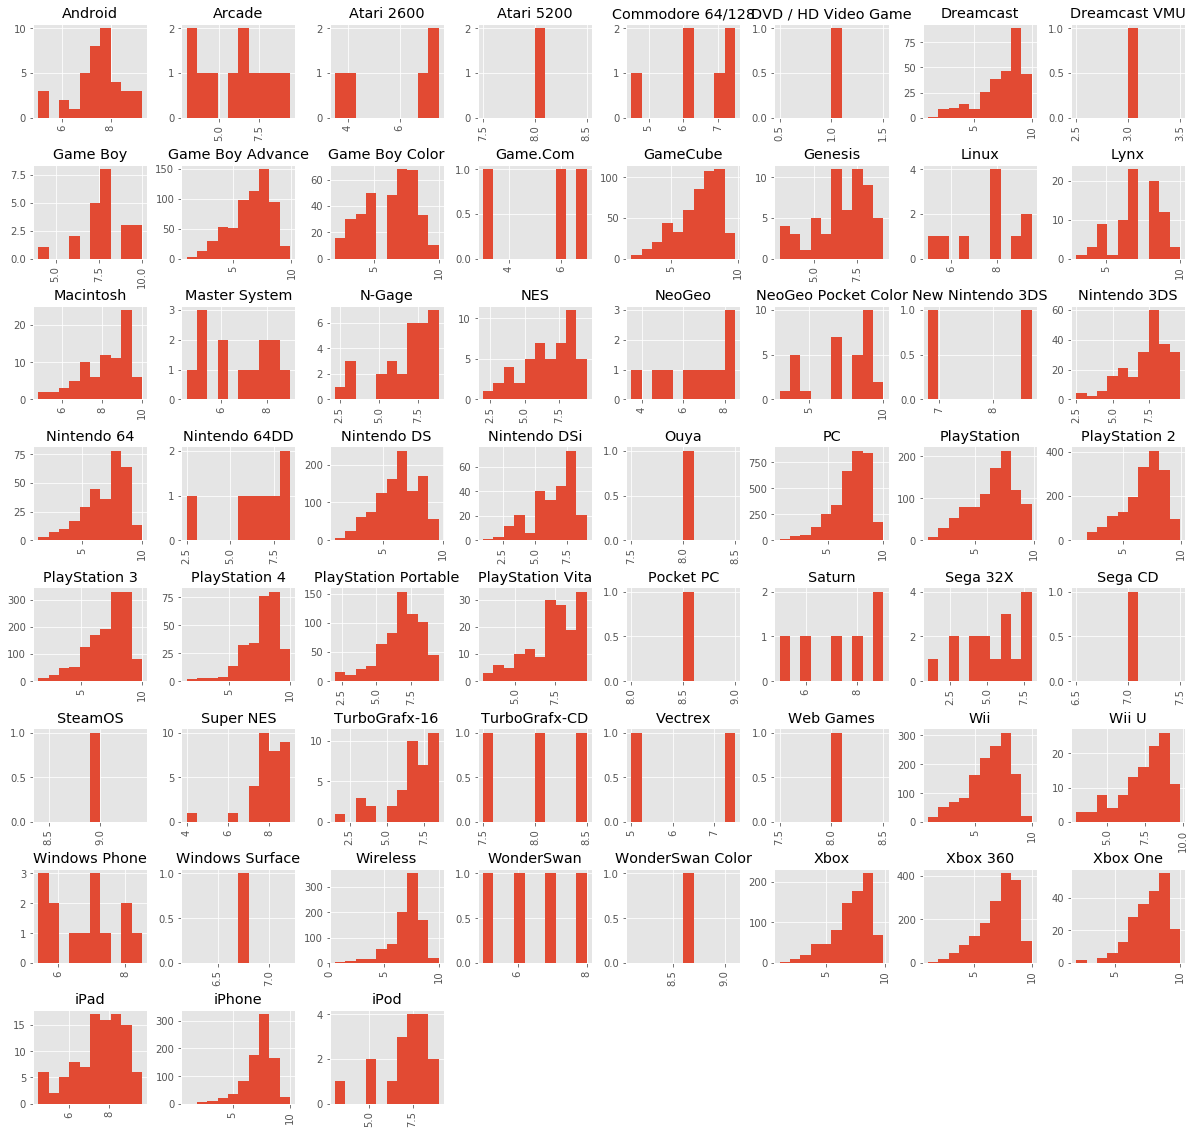

In [8]:
plot.rcParams["figure.figsize"] = [20,20];
reviews['score'].hist(by = reviews['platform']);

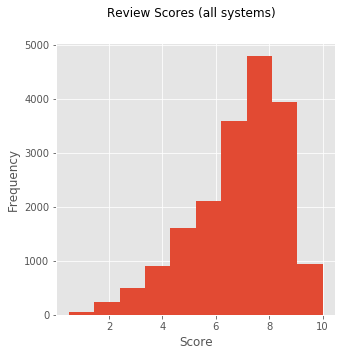

In [9]:
plot.subplots(figsize = (5,5))
reviews["score"].plot(kind = "hist");
plot.xlabel('Score');
plot.suptitle("Review Scores (all systems)");

## Section 3.1 Reading in data

In [10]:
from sklearn import datasets
digits = datasets.load_digits()

In [11]:
type(digits)

sklearn.utils.Bunch

In [12]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [13]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [14]:
digits.data
digits.data.shape

(1797, 64)

In [15]:
digits_target = digits.target
digits_target.shape

(1797,)

In [16]:
digits.images.shape

(1797, 8, 8)

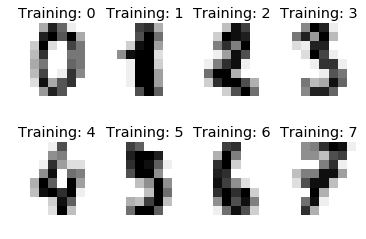

In [17]:
%matplotlib inline
import matplotlib.pyplot as plot
image_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label_list[:8]):
    plot.subplot(2, 4, index + 1)
    plot.axis('off')
    plot.imshow(image, cmap = plot.cm.gray_r, interpolation = 'nearest')
    plot.title('Training: ' + str(label))

In [18]:
len(image_label_list)

1797

## Section 3.2: Making predictions

In [19]:
from sklearn.preprocessing import scale
data = scale(digits.data)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images, test_size = 0.25, random_state = 489)

In [21]:
x_train.shape

(1347, 64)

In [22]:
x_test.shape

(450, 64)

In [23]:
from sklearn import cluster
k_means_predictor = cluster.KMeans(n_clusters = 10, random_state = 489)
k_means_predictor.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=489, tol=0.0001, verbose=0)

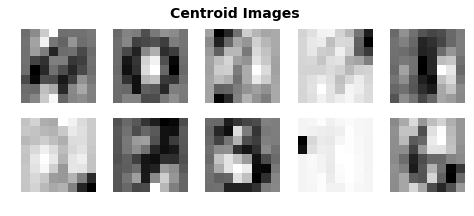

In [24]:
fig = plot.figure(figsize=(8, 3))
fig.suptitle('Centroid Images', fontsize = 14, fontweight = 'bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(k_means_predictor.cluster_centers_[i].reshape((8, 8)), cmap = plot.cm.binary)
    plot.axis('off')

In [25]:
y_pred_k_means = k_means_predictor.predict(x_test)

In [26]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

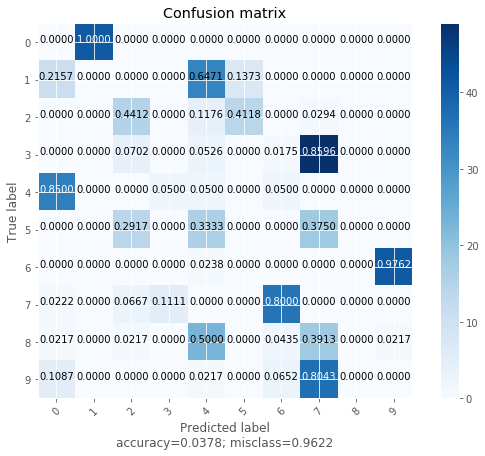

In [27]:
from sklearn.metrics import confusion_matrix

labels = [i for i in range(10)]
k_means_cm = confusion_matrix(y_test, y_pred_k_means, labels)

    
plot_confusion_matrix(k_means_cm, labels)

In [28]:
type(digits)

sklearn.utils.Bunch

## Section 3.3: Another Algorithm

In [29]:
from sklearn import svm

svm_predictor = svm.SVC(kernel = 'linear')
svm_predictor.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

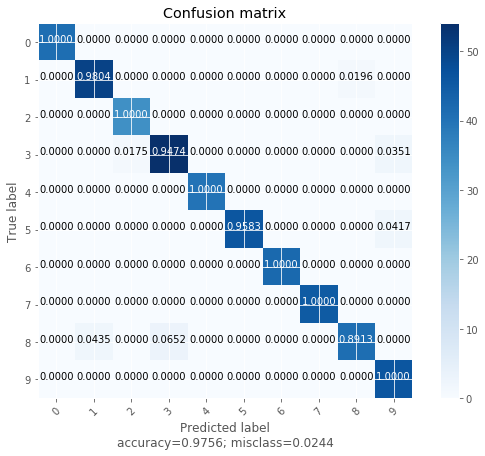

In [30]:
y_pred_svm = svm_predictor.predict(x_test)
svm_cm = confusion_matrix(y_test, y_pred_svm, labels)
plot_confusion_matrix(svm_cm, labels)